In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import plotly.express as px

Data Reading: From google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
location ='/content/drive/MyDrive/Colab Notebooks/big-data-Colab/NYPD_Complaint_Data_Current__Year_To_Date_.csv'

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
location ='/content/drive/MyDrive/Final_Project/NYPD_Complaint_Data_Current__Year_To_Date_.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(location)
print(df)

         CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0         264551409         43.0          BRONX   03/04/2023     12:55:00   
1       268554247H1          NaN  STATEN ISLAND   05/19/2023     15:52:00   
2         270383297         52.0          BRONX   06/24/2023     14:35:00   
3         267154459         32.0      MANHATTAN   04/01/2022     15:00:00   
4         262715874         30.0      MANHATTAN   12/29/2022     00:00:00   
...             ...          ...            ...          ...          ...   
271712    270540659         67.0       BROOKLYN   06/28/2023     21:10:00   
271713    270618807         14.0      MANHATTAN   06/29/2023     14:45:00   
271714    270556526         75.0       BROOKLYN   06/29/2023     01:20:00   
271715    270635455         83.0       BROOKLYN   06/28/2023     10:30:00   
271716    270635444         63.0       BROOKLYN   06/30/2023     10:20:00   

       CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  

Data Structure

In [ ]:
print(len(df))

271717


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271717 entries, 0 to 271716
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                271717 non-null  object 
 1   ADDR_PCT_CD               271683 non-null  float64
 2   BORO_NM                   271717 non-null  object 
 3   CMPLNT_FR_DT              271717 non-null  object 
 4   CMPLNT_FR_TM              271717 non-null  object 
 5   CMPLNT_TO_DT              253642 non-null  object 
 6   CMPLNT_TO_TM              271717 non-null  object 
 7   CRM_ATPT_CPTD_CD          271717 non-null  object 
 8   HADEVELOPT                271717 non-null  object 
 9   HOUSING_PSA               17996 non-null   float64
 10  JURISDICTION_CODE         271717 non-null  int64  
 11  JURIS_DESC                271717 non-null  object 
 12  KY_CD                     271717 non-null  int64  
 13  LAW_CAT_CD                271717 non-null  o

In [ ]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column', 'Zip Codes',
       'Community Districts', 'Borough Boundaries', 'City Council Districts',
       'Police Precincts'],
      dtype='object')

In [ ]:
df.dtypes

CMPLNT_NUM                   object
ADDR_PCT_CD                 float64
BORO_NM                      object
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
CMPLNT_TO_DT                 object
CMPLNT_TO_TM                 object
CRM_ATPT_CPTD_CD             object
HADEVELOPT                   object
HOUSING_PSA                 float64
JURISDICTION_CODE             int64
JURIS_DESC                   object
KY_CD                         int64
LAW_CAT_CD                   object
LOC_OF_OCCUR_DESC            object
OFNS_DESC                    object
PARKS_NM                     object
PATROL_BORO                  object
PD_CD                       float64
PD_DESC                      object
PREM_TYP_DESC                object
RPT_DT                       object
STATION_NAME                 object
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     object
TRANSIT_DISTRICT            float64
VIC_AGE_GROUP               

In [ ]:
df.isna().sum()

CMPLNT_NUM                       0
ADDR_PCT_CD                     34
BORO_NM                          0
CMPLNT_FR_DT                     0
CMPLNT_FR_TM                     0
CMPLNT_TO_DT                 18075
CMPLNT_TO_TM                     0
CRM_ATPT_CPTD_CD                 0
HADEVELOPT                       0
HOUSING_PSA                 253721
JURISDICTION_CODE                0
JURIS_DESC                       0
KY_CD                            0
LAW_CAT_CD                       0
LOC_OF_OCCUR_DESC                0
OFNS_DESC                        0
PARKS_NM                         0
PATROL_BORO                      0
PD_CD                          201
PD_DESC                          0
PREM_TYP_DESC                    0
RPT_DT                           0
STATION_NAME                     0
SUSP_AGE_GROUP                   0
SUSP_RACE                        0
SUSP_SEX                         0
TRANSIT_DISTRICT            265267
VIC_AGE_GROUP                    0
VIC_RACE            

In [ ]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,264551409,43.0,BRONX,03/04/2023,12:55:00,NaN,(null),COMPLETED,(null),NaN,...,239111.0,40.822882,-73.848929,"(40.822882, -73.848929)",POINT (-73.848929 40.822882),"11,611",58.0,5.0,31.0,26.0
1,268554247H1,NaN,STATEN ISLAND,05/19/2023,15:52:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,270383297,52.0,BRONX,06/24/2023,14:35:00,NaN,(null),COMPLETED,(null),NaN,...,255273.0,40.867300,-73.903374,"(40.8673, -73.903374)",POINT (-73.903374 40.8673),"11,606",24.0,5.0,29.0,34.0
3,267154459,32.0,MANHATTAN,04/01/2022,15:00:00,04/01/2023,15:00:00,COMPLETED,(null),NaN,...,236537.0,40.815904,-73.945123,"(40.815904, -73.945123)",POINT (-73.945123 40.815904),"12,427",18.0,4.0,36.0,20.0
4,262715874,30.0,MANHATTAN,12/29/2022,00:00:00,01/29/2023,16:00:00,COMPLETED,(null),NaN,...,240313.0,40.826268,-73.943126,"(40.826268, -73.943126)",POINT (-73.943126 40.826268),"12,428",37.0,4.0,36.0,19.0


Data Cleaning


In [ ]:
#Remove unnecessary columns
column_name=['HADEVELOPT','HOUSING_PSA','JURISDICTION_CODE','JURIS_DESC','KY_CD','PARKS_NM','STATION_NAME']
df.drop(columns=column_name, inplace=True)
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,...,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,264551409,43.0,BRONX,03/04/2023,12:55:00,NaN,(null),COMPLETED,FELONY,INSIDE,...,239111.0,40.822882,-73.848929,"(40.822882, -73.848929)",POINT (-73.848929 40.822882),"11,611",58.0,5.0,31.0,26.0
1,268554247H1,NaN,STATEN ISLAND,05/19/2023,15:52:00,NaN,(null),COMPLETED,FELONY,OUTSIDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,270383297,52.0,BRONX,06/24/2023,14:35:00,NaN,(null),COMPLETED,VIOLATION,INSIDE,...,255273.0,40.867300,-73.903374,"(40.8673, -73.903374)",POINT (-73.903374 40.8673),"11,606",24.0,5.0,29.0,34.0
3,267154459,32.0,MANHATTAN,04/01/2022,15:00:00,04/01/2023,15:00:00,COMPLETED,MISDEMEANOR,INSIDE,...,236537.0,40.815904,-73.945123,"(40.815904, -73.945123)",POINT (-73.945123 40.815904),"12,427",18.0,4.0,36.0,20.0
4,262715874,30.0,MANHATTAN,12/29/2022,00:00:00,01/29/2023,16:00:00,COMPLETED,MISDEMEANOR,INSIDE,...,240313.0,40.826268,-73.943126,"(40.826268, -73.943126)",POINT (-73.943126 40.826268),"12,428",37.0,4.0,36.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271712,270540659,67.0,BROOKLYN,06/28/2023,21:10:00,06/28/2023,21:33:00,COMPLETED,MISDEMEANOR,INSIDE,...,177493.0,40.653822,-73.910472,"(40.653822, -73.910472)",POINT (-73.910472 40.653822),"13,827",61.0,2.0,25.0,40.0
271713,270618807,14.0,MANHATTAN,06/29/2023,14:45:00,06/29/2023,14:46:00,COMPLETED,MISDEMEANOR,INSIDE,...,212402.0,40.749673,-73.987955,"(40.749673, -73.987955)",POINT (-73.987955 40.749673),"11,722",11.0,4.0,51.0,8.0
271714,270556526,75.0,BROOKLYN,06/29/2023,01:20:00,06/29/2023,01:21:00,COMPLETED,MISDEMEANOR,INSIDE,...,185750.0,40.676472,-73.897039,"(40.676472, -73.897039)",POINT (-73.897039 40.676472),"17,214",45.0,2.0,37.0,47.0
271715,270635455,83.0,BROOKLYN,06/28/2023,10:30:00,NaN,(null),COMPLETED,FELONY,FRONT OF,...,192307.0,40.694495,-73.930828,"(40.694495, -73.930828)",POINT (-73.930828 40.694495),"18,181",69.0,2.0,49.0,52.0


In [ ]:
#Feature engineering
#For categorical features, convert all string values to numerical values. For Nan and (null) values, populate as '0'
df = df.replace("(null)", np.NaN)
df = df.fillna(value = 0)
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,...,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,264551409,43.0,BRONX,03/04/2023,12:55:00,0,0,COMPLETED,FELONY,INSIDE,...,239111.0,40.822882,-73.848929,"(40.822882, -73.848929)",POINT (-73.848929 40.822882),"11,611",58.0,5.0,31.0,26.0
1,268554247H1,0.0,STATEN ISLAND,05/19/2023,15:52:00,0,0,COMPLETED,FELONY,OUTSIDE,...,0.0,0.000000,0.000000,0,0,0,0.0,0.0,0.0,0.0
2,270383297,52.0,BRONX,06/24/2023,14:35:00,0,0,COMPLETED,VIOLATION,INSIDE,...,255273.0,40.867300,-73.903374,"(40.8673, -73.903374)",POINT (-73.903374 40.8673),"11,606",24.0,5.0,29.0,34.0
3,267154459,32.0,MANHATTAN,04/01/2022,15:00:00,04/01/2023,15:00:00,COMPLETED,MISDEMEANOR,INSIDE,...,236537.0,40.815904,-73.945123,"(40.815904, -73.945123)",POINT (-73.945123 40.815904),"12,427",18.0,4.0,36.0,20.0
4,262715874,30.0,MANHATTAN,12/29/2022,00:00:00,01/29/2023,16:00:00,COMPLETED,MISDEMEANOR,INSIDE,...,240313.0,40.826268,-73.943126,"(40.826268, -73.943126)",POINT (-73.943126 40.826268),"12,428",37.0,4.0,36.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271712,270540659,67.0,BROOKLYN,06/28/2023,21:10:00,06/28/2023,21:33:00,COMPLETED,MISDEMEANOR,INSIDE,...,177493.0,40.653822,-73.910472,"(40.653822, -73.910472)",POINT (-73.910472 40.653822),"13,827",61.0,2.0,25.0,40.0
271713,270618807,14.0,MANHATTAN,06/29/2023,14:45:00,06/29/2023,14:46:00,COMPLETED,MISDEMEANOR,INSIDE,...,212402.0,40.749673,-73.987955,"(40.749673, -73.987955)",POINT (-73.987955 40.749673),"11,722",11.0,4.0,51.0,8.0
271714,270556526,75.0,BROOKLYN,06/29/2023,01:20:00,06/29/2023,01:21:00,COMPLETED,MISDEMEANOR,INSIDE,...,185750.0,40.676472,-73.897039,"(40.676472, -73.897039)",POINT (-73.897039 40.676472),"17,214",45.0,2.0,37.0,47.0
271715,270635455,83.0,BROOKLYN,06/28/2023,10:30:00,0,0,COMPLETED,FELONY,FRONT OF,...,192307.0,40.694495,-73.930828,"(40.694495, -73.930828)",POINT (-73.930828 40.694495),"18,181",69.0,2.0,49.0,52.0


In [ ]:
#Type Conversion
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

In [ ]:
# Remove rows containing NaN values
df = df.dropna(subset=['BORO_NM'])

EDA

<Axes: title={'center': 'Top 10 crimes happening in NYC'}>

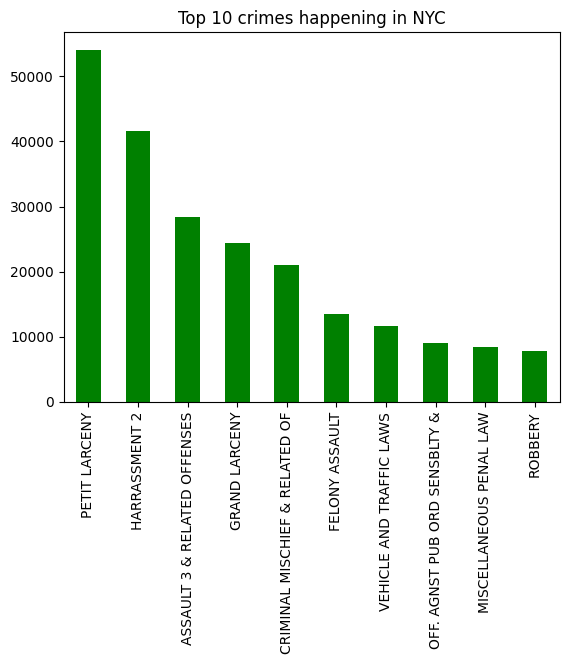

In [ ]:
df.OFNS_DESC.value_counts().sort_values(ascending=False).iloc[0:10].plot(kind='bar', color='green', title='Top 10 crimes happening in NYC')

<Axes: title={'center': 'Level of offense'}, ylabel='LAW_CAT_CD'>

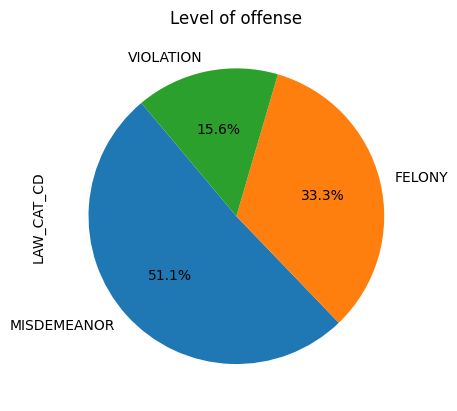

In [ ]:
df.LAW_CAT_CD.value_counts().plot(kind='pie', title='Level of offense',autopct='%1.1f%%', startangle=130)

<Axes: title={'center': 'Number of crimes happening in a Borough'}>

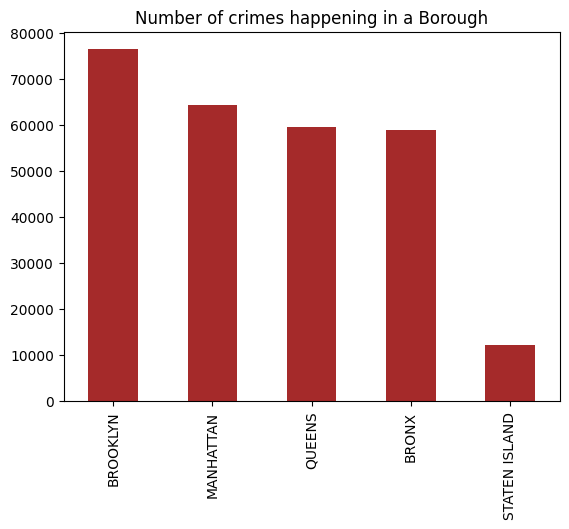

In [ ]:
df = df[df['BORO_NM'] != 0]
df.BORO_NM.value_counts().plot(kind='bar', color='brown', title='Number of crimes happening in a Borough')

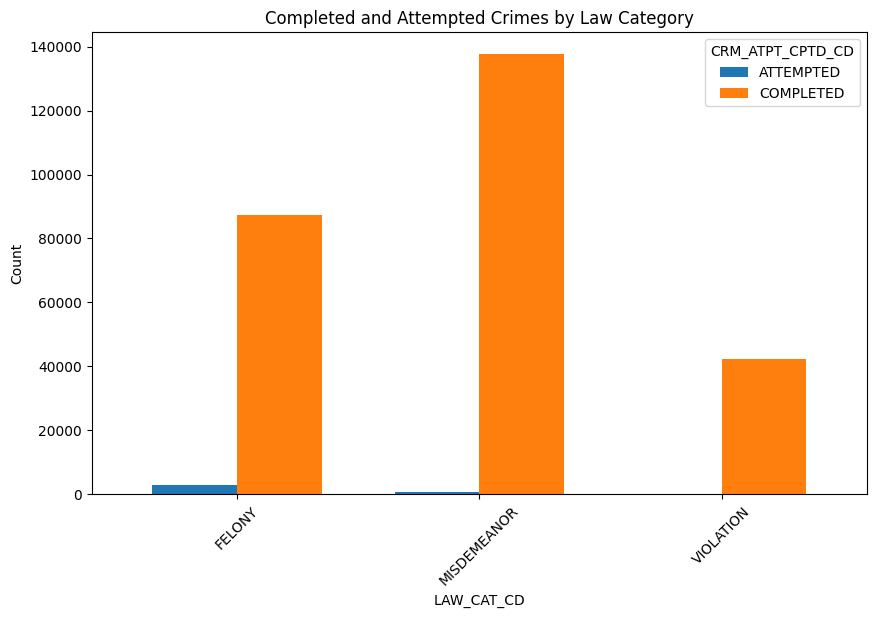

In [ ]:
# Group the data by LAW_CAT_CD and CRM_ATPT_CPTD_CD and count occurrences
grouped_data = df.groupby(['LAW_CAT_CD', 'CRM_ATPT_CPTD_CD']).size().unstack()

# Plot the bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6), width=0.7, align='center')

# Customize the chart
ax.set_xlabel('LAW_CAT_CD')
ax.set_ylabel('Count')
ax.set_title('Completed and Attempted Crimes by Law Category')
ax.legend(title='CRM_ATPT_CPTD_CD', loc='upper right')

# Show the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

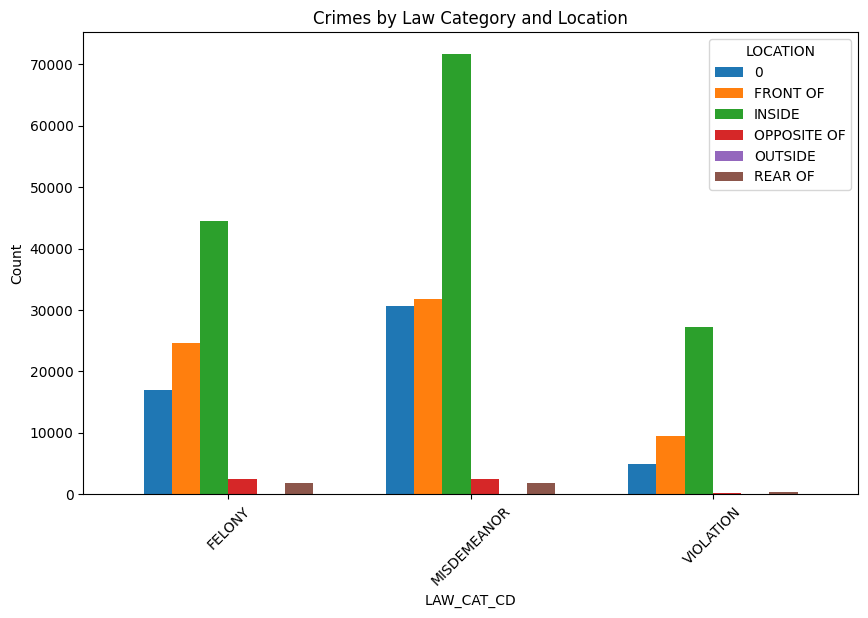

In [ ]:
# Group the data by LAW_CAT_CD and LOCATION and count occurrences
df_filtered = df[(df['LAW_CAT_CD'] != 0) & (df['LOC_OF_OCCUR_DESC'] != 0)]
grouped_data = df.groupby(['LAW_CAT_CD', 'LOC_OF_OCCUR_DESC']).size().unstack()

# Plot the bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6), width=0.7, align='center')

# Customize the chart
ax.set_xlabel('LAW_CAT_CD')
ax.set_ylabel('Count')
ax.set_title('Crimes by Law Category and Location')
ax.legend(title='LOCATION', loc='upper right')

# Show the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Suspect Analysis

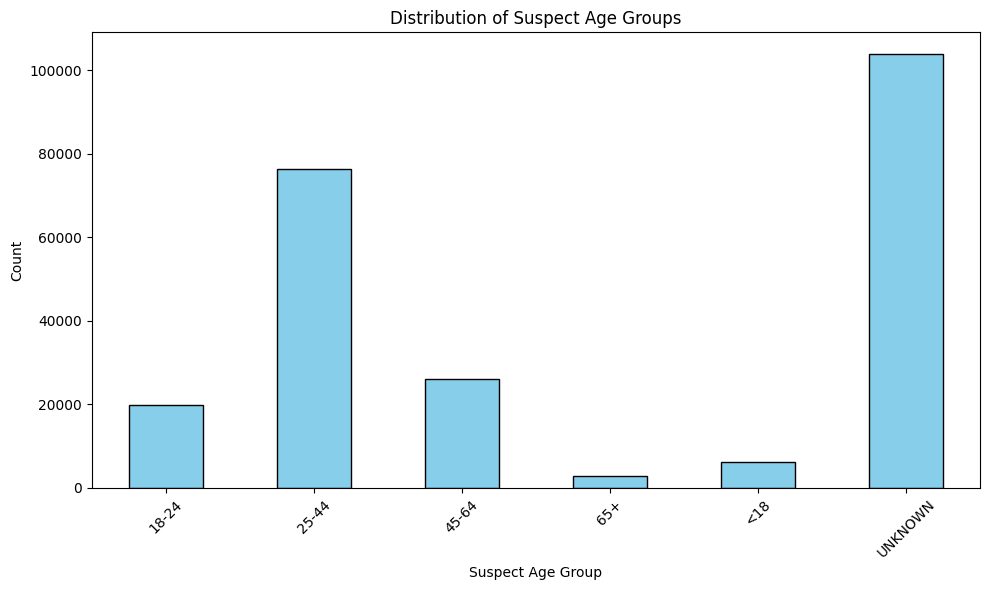

In [ ]:
# Group the data by SUSP_AGE_GROUP and count occurrences
wanted_age_groups=['<18','18-24','25-44','45-64','65+','UNKNOWN']
dfformat = df[df['SUSP_AGE_GROUP'].isin(wanted_age_groups)]
age_group_counts = dfformat['SUSP_AGE_GROUP'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Suspect Age Group')
plt.ylabel('Count')
plt.title('Distribution of Suspect Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.tight_layout()
plt.show()

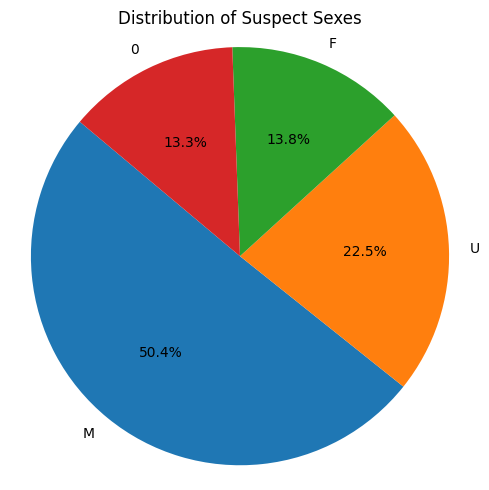

In [ ]:
# Group the data by SUSP_SEX and count occurrences
sex_counts = df['SUSP_SEX'].value_counts()

# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

# Customize the chart
plt.title('Distribution of Suspect Sexes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the chart
plt.tight_layout()
plt.show()

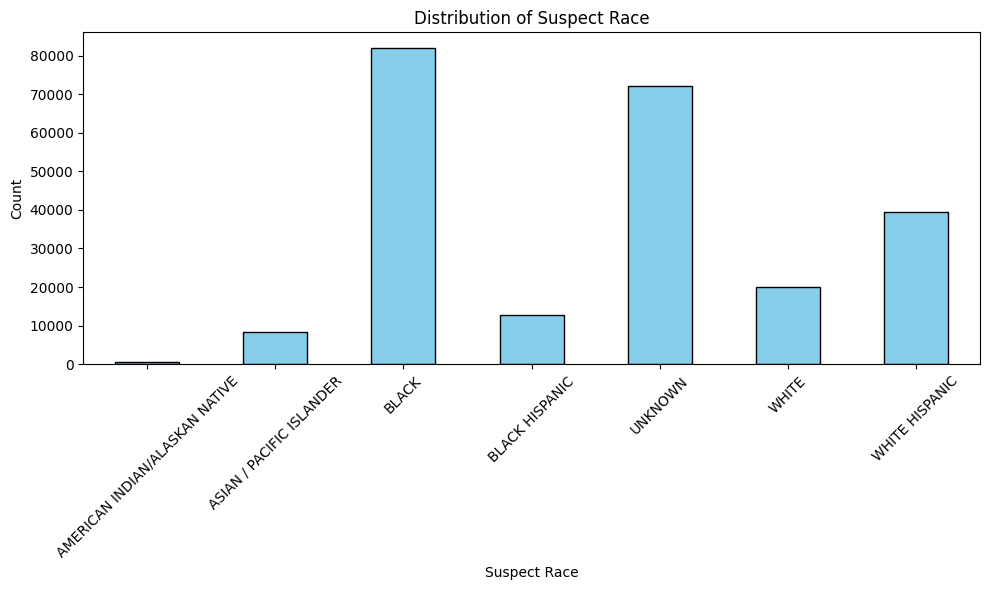

In [ ]:
# Group the data by SUSP_AGE_GROUP and count occurrences
wanted_age_groups=['WHITE HISPANIC','BLACK','WHITE','BLACK HISPANIC','ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE','UNKNOWN']
dfformat = df[df['SUSP_RACE'].isin(wanted_age_groups)]
age_group_counts = dfformat['SUSP_RACE'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Suspect Race')
plt.ylabel('Count')
plt.title('Distribution of Suspect Race')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.tight_layout()
plt.show()

Victim Analysis

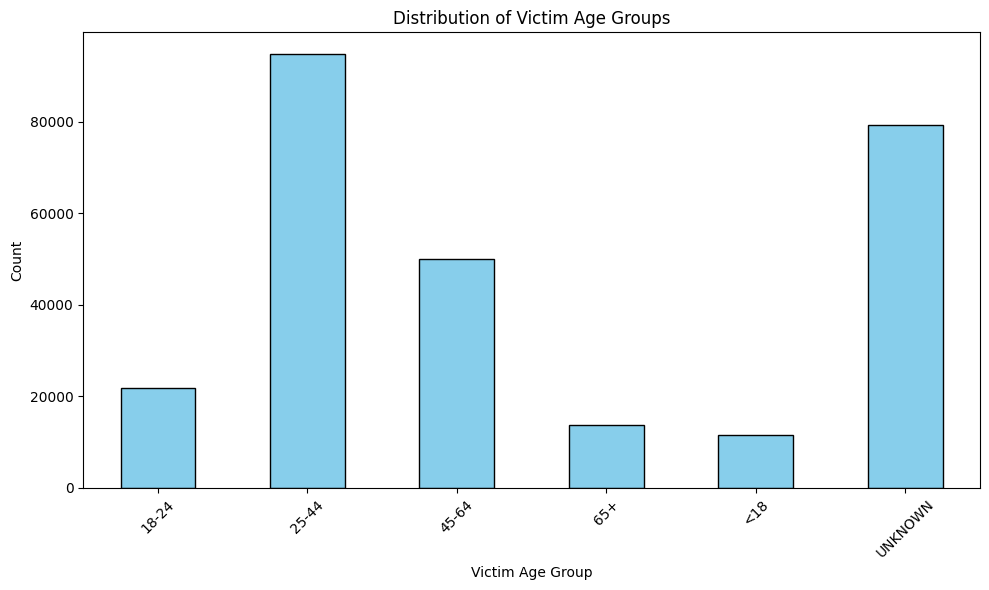

In [ ]:
# Group the data by VIC_AGE_GROUP and count occurrences
wanted_age_groups=['<18','18-24','25-44','45-64','65+','UNKNOWN']
dfformat = df[df['VIC_AGE_GROUP'].isin(wanted_age_groups)]
age_group_counts = dfformat['VIC_AGE_GROUP'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Victim Age Group')
plt.ylabel('Count')
plt.title('Distribution of Victim Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.tight_layout()
plt.show()

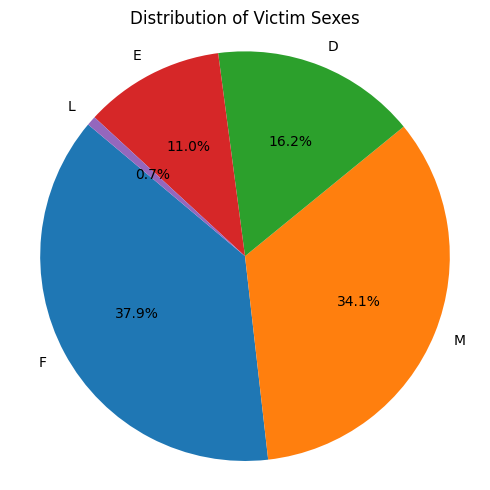

In [ ]:
# Group the data by VIC_SEX and count occurrences
sex_counts = df['VIC_SEX'].value_counts()

# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

# Customize the chart
plt.title('Distribution of Victim Sexes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the chart
plt.tight_layout()
plt.show()


# 'F': Female
# 'M': Male
# 'E': Either or Unknown (used when the gender of the victim is not specified or when it could be either male or female)
# 'L': LGBTQ+ or Lesbian (used to specify the victim's sexual orientation or gender identity)
# 'D': Non-binary or Other Gender Identity (used to specify a gender identity other than male or female)

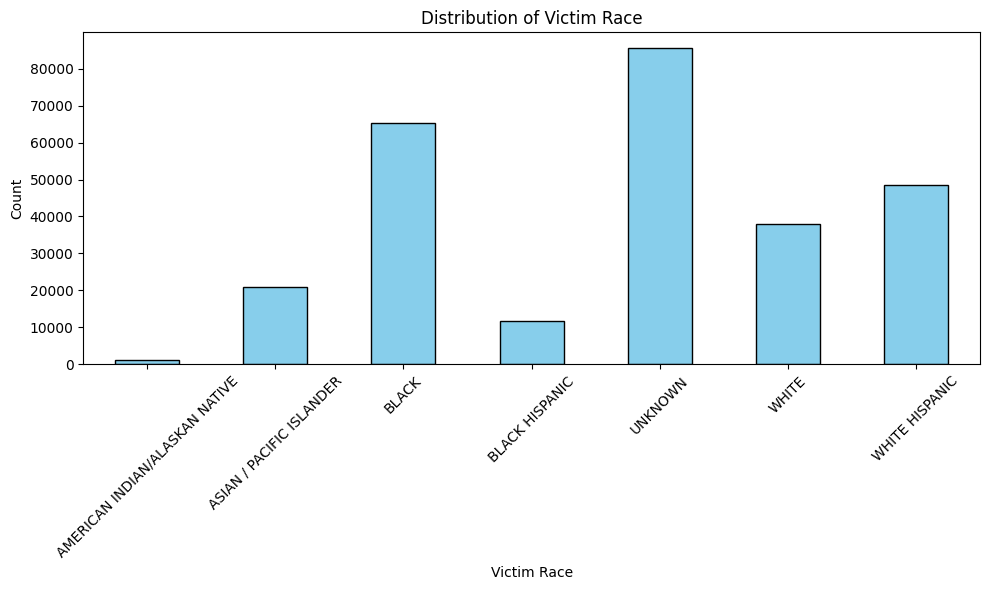

In [ ]:
# Group the data by SUSP_AGE_GROUP and count occurrences
wanted_age_groups=['WHITE HISPANIC','BLACK','WHITE','BLACK HISPANIC','ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE','UNKNOWN']
dfformat = df[df['VIC_RACE'].isin(wanted_age_groups)]
age_group_counts = dfformat['VIC_RACE'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.xlabel('Victim Race')
plt.ylabel('Count')
plt.title('Distribution of Victim Race')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.tight_layout()
plt.show()

F    37.916442
M    34.089485
D    16.199140
E    11.047382
L     0.747551
Name: VIC_SEX, dtype: float64


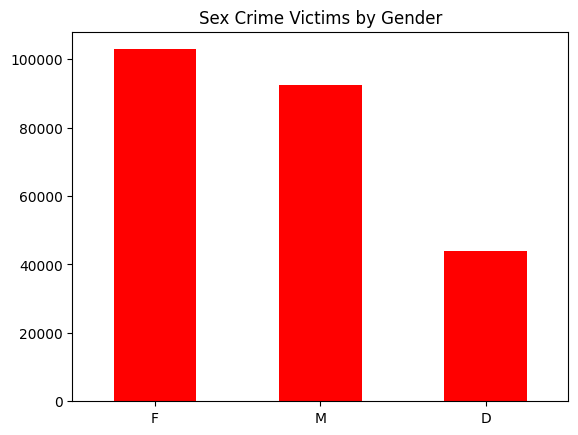

In [ ]:
df['VIC_SEX'].value_counts().iloc[:3].plot(kind="bar",  color = '#FF0000', title = 'Sex Crime Victims by Gender', rot=0)

#victims by gender percentage
vic_sex_per = df['VIC_SEX'].value_counts() / df['VIC_SEX'].shape[0] *100
print(vic_sex_per)

M    50.387414
U    22.486601
F    13.824893
0    13.301092
Name: SUSP_SEX, dtype: float64


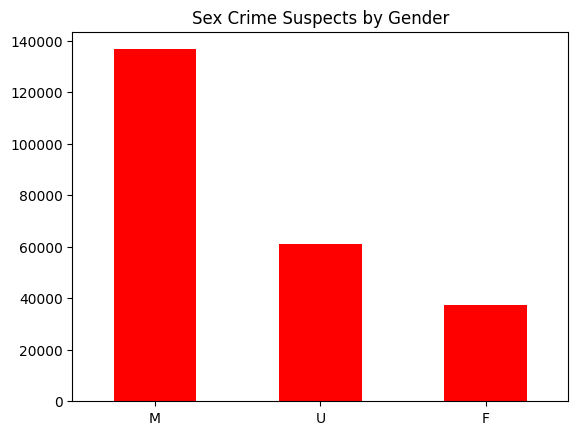

In [ ]:
df['SUSP_SEX'].value_counts().iloc[:3].plot(kind="bar",  color = '#FF0000', title = 'Sex Crime Suspects by Gender', rot=0)

#victims by gender percentage
susp_sex_per = df['SUSP_SEX'].value_counts() / df['SUSP_SEX'].shape[0] *100
print(susp_sex_per)

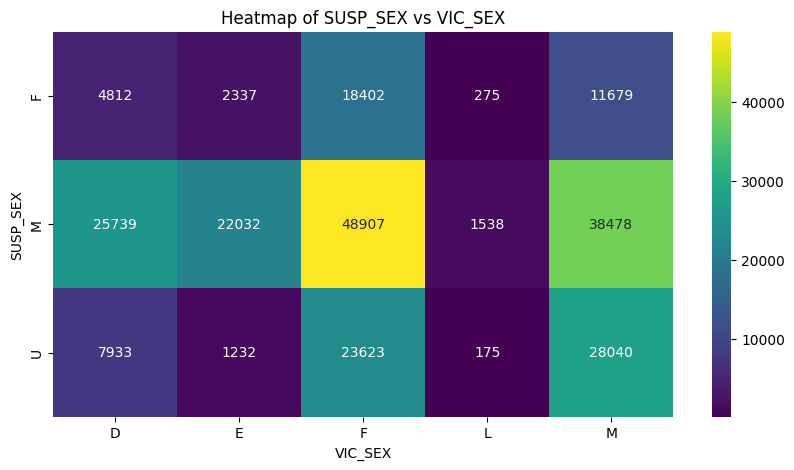

In [ ]:
column1 = 'SUSP_SEX'
column2 = 'VIC_SEX'
df = df[(df[column1] != 0) & (df[column2] != 0)]
df.reset_index(drop=True, inplace=True)

susp_race_column = 'SUSP_SEX'
vic_race_column = 'VIC_SEX'

# Create a cross-tabulation (contingency table) of the two variables
cross_table = pd.crosstab(df[susp_race_column], df[vic_race_column])

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cross_table, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title(f'Heatmap of {susp_race_column} vs {vic_race_column}')
plt.xlabel(vic_race_column)
plt.ylabel(susp_race_column)
plt.show()

Time Analysis

In [ ]:
df['CMPLNT_YEAR'] = df['CMPLNT_FR_DT'].dt.year
df['CMPLNT_YEAR'].value_counts().sort_index()

#Year 2023 only can't derive solid conclusion from just one year but temprature does affect number of crimes

1923.0         1
1971.0         1
1972.0         1
1973.0         4
1978.0         1
1980.0         1
1984.0         1
1985.0         2
1987.0         1
1988.0         1
1989.0         3
1990.0         1
1991.0         1
1992.0         2
1993.0         4
1994.0         2
1995.0         2
1996.0         2
1997.0         3
1998.0         2
1999.0         2
2000.0         5
2001.0         9
2002.0         5
2003.0        15
2004.0         8
2005.0         5
2006.0        11
2007.0         8
2008.0         7
2009.0        11
2010.0        14
2011.0        17
2012.0        27
2013.0        49
2014.0        29
2015.0        44
2016.0        50
2017.0        49
2018.0        89
2019.0       117
2020.0       189
2021.0       451
2022.0      5805
2023.0    228135
Name: CMPLNT_YEAR, dtype: int64

<Axes: title={'center': 'Total Crime Events by Month'}>

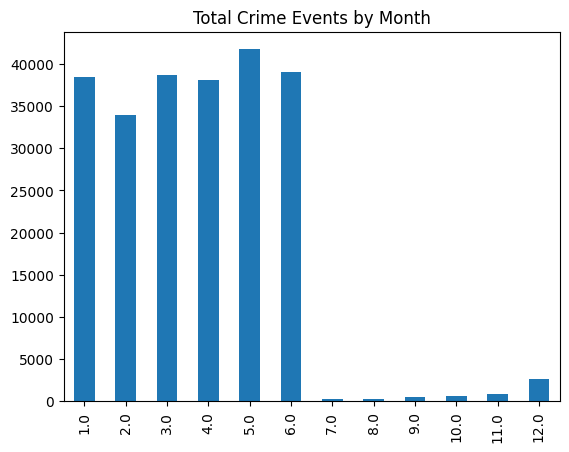

In [ ]:
df['CMPLNT_MONTH'] = df['CMPLNT_FR_DT'].dt.month
df['CMPLNT_MONTH'].value_counts().sort_index().plot(kind="bar", title = "Total Crime Events by Month")

#Year 2023 only can't derive solid conclusion from just one year but temprature does affect number of crimes

<Axes: title={'center': 'Total Crime Events by Hour'}>

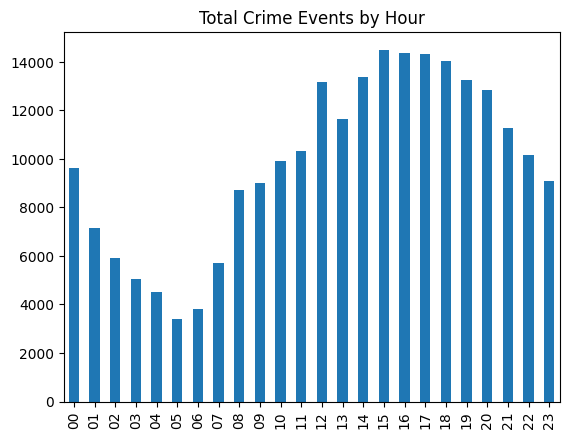

In [ ]:
df['CMPLNT_HOUR'] = df['CMPLNT_FR_TM'].str.split(':').str[0]
df['CMPLNT_HOUR'].value_counts().sort_index().plot(kind="bar", title = "Total Crime Events by Hour")

#Graph says crimes happens mostly during nights

In [ ]:
borough_crime_counts = df['CMPLNT_NUM'].groupby(df['BORO_NM']).count()

borough_crime_counts_df = borough_crime_counts.reset_index()
borough_crime_counts_df.columns = ['BORO_NM', 'Crime_Count']
borough_crime_counts_df = borough_crime_counts_df.replace(0, np.NaN)
borough_crime_counts_df = borough_crime_counts_df.dropna()

#FIPS - Federal Information Processing Standards
fips_value = [36005, 36047, 36061, 36081, 36085]
borough_crime_counts_df['fips'] = fips_value

print(borough_crime_counts_df)

         BORO_NM  Crime_Count   fips
0          BRONX        52459  36005
1       BROOKLYN        63961  36047
2      MANHATTAN        58609  36061
3         QUEENS        50084  36081
4  STATEN ISLAND        10089  36085


In [ ]:
r = requests.get('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
counties = json.loads(r.text)
target_states = ['36'] #36 is for New York state
counties['features'] = [f for f in counties['features'] if f['properties']['STATE'] in target_states]

fig = px.choropleth(borough_crime_counts_df, geojson=counties, locations='fips', color='Crime_Count',
                    color_continuous_scale='Viridis',
                    scope='usa',
                    labels={'Crime Count': 'Crime_Count'}
                    )
fig.update_geos(center={'lon': -74, 'lat': 43}, projection_scale=6)
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

In [ ]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
unique_values = df['LAW_CAT_CD'].unique()
print(unique_values)

['FELONY' 'VIOLATION' 'MISDEMEANOR']


In [ ]:
# Assume 'df' is your DataFrame and 'categorical_column' is the column you want to one-hot encode
df_encoded = pd.get_dummies(df, columns=['LAW_CAT_CD'])

# Display the resulting DataFrame
print(df_encoded)

         CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0         264551409         43.0          BRONX   2023-03-04     12:55:00   
1       268554247H1          0.0  STATEN ISLAND   2023-05-19     15:52:00   
2         270383297         52.0          BRONX   2023-06-24     14:35:00   
3         267154459         32.0      MANHATTAN   2022-04-01     15:00:00   
4         262715874         30.0      MANHATTAN   2022-12-29     00:00:00   
...             ...          ...            ...          ...          ...   
235197    270637251         30.0      MANHATTAN   2023-06-30     14:40:00   
235198    270540659         67.0       BROOKLYN   2023-06-28     21:10:00   
235199    270618807         14.0      MANHATTAN   2023-06-29     14:45:00   
235200    270556526         75.0       BROOKLYN   2023-06-29     01:20:00   
235201    270635444         63.0       BROOKLYN   2023-06-30     10:20:00   

       CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD LOC_OF_OCCUR_DESC  \
0   

In [ ]:
# Assume 'df' is your DataFrame and 'categorical_column' is the column you want to one-hot encode
df = pd.get_dummies(df, columns=['OFNS_DESC'])

# Display the resulting DataFrame
print(df)

         CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0         264551409         43.0          BRONX   2023-03-04     12:55:00   
1       268554247H1          0.0  STATEN ISLAND   2023-05-19     15:52:00   
2         270383297         52.0          BRONX   2023-06-24     14:35:00   
3         267154459         32.0      MANHATTAN   2022-04-01     15:00:00   
4         262715874         30.0      MANHATTAN   2022-12-29     00:00:00   
...             ...          ...            ...          ...          ...   
235197    270637251         30.0      MANHATTAN   2023-06-30     14:40:00   
235198    270540659         67.0       BROOKLYN   2023-06-28     21:10:00   
235199    270618807         14.0      MANHATTAN   2023-06-29     14:45:00   
235200    270556526         75.0       BROOKLYN   2023-06-29     01:20:00   
235201    270635444         63.0       BROOKLYN   2023-06-30     10:20:00   

       CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD   LAW_CAT_CD  \
0        

In [ ]:
# Group by 'BORO_NM' and 'OFNS_DESC', count occurrences, and reset the index
crime_counts = df.groupby(['BORO_NM']).size().reset_index(name='COUNT')

# Find the index of the maximum count for each borough
idx = crime_counts.groupby(['BORO_NM'])['COUNT'].transform(max) == crime_counts['COUNT']

# Filter the rows with maximum counts for each borough
most_common_crime_by_borough = crime_counts[idx]

most_common_crime_by_borough

,BORO_NM,COUNT
0,BRONX,52459
1,BROOKLYN,63961
2,MANHATTAN,58609
3,QUEENS,50084
4,STATEN ISLAND,10089


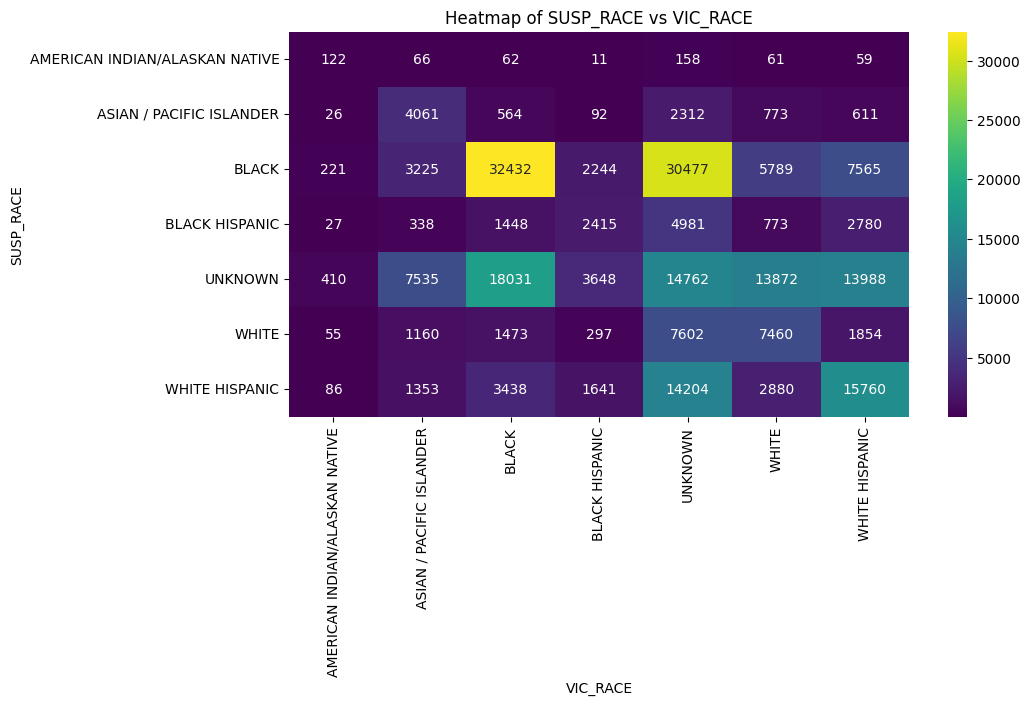

In [ ]:
column1 = 'SUSP_RACE'
column2 = 'VIC_RACE'
df = df[(df[column1] != 0) & (df[column2] != 0)]
df.reset_index(drop=True, inplace=True)

susp_race_column = 'SUSP_RACE'
vic_race_column = 'VIC_RACE'

# Create a cross-tabulation (contingency table) of the two variables
cross_table = pd.crosstab(df[susp_race_column], df[vic_race_column])

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cross_table, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title(f'Heatmap of {susp_race_column} vs {vic_race_column}')
plt.xlabel(vic_race_column)
plt.ylabel(susp_race_column)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'OFNS_DESC' is a categorical target variable
target_column = 'LAW_CAT_CD'
feature_column = 'SUSP_RACE'

# Separate features and target variable
X = df[feature_column]
y = df[target_column]

# Handle missing values (if any)
X = X.dropna()

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.50

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

      FELONY       0.00      0.00      0.00     23083
 MISDEMEANOR       0.50      1.00      0.67     35216
   VIOLATION       0.00      0.00      0.00     12262

    accuracy                           0.50     70561
   macro avg       0.17      0.33      0.22     70561
weighted avg       0.25      0.50      0.33     70561



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

y_DT = df['LAW_CAT_CD']

selected_features = ['SUSP_RACE', 'SUSP_SEX', 'SUSP_AGE_GROUP']
X_DT = df[selected_features]

X_DT = pd.get_dummies(X_DT)

# Split the data into training and testing sets
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT, y_DT, test_size=0.3, random_state=1)

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the model
decision_tree_classifier.fit(X_train_DT, y_train_DT)

# Make predictions on the test set
y_pred_dt = decision_tree_classifier.predict(X_test_DT)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_DT, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.50


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5)
grid_search.fit(X_train_DT, y_train_DT)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the model
decision_tree_classifier.fit(X_train_DT, y_train_DT)

# Make predictions on the test set
y_pred_dt = decision_tree_classifier.predict(X_test_DT)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_DT, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.50


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select relevant features and target variable
selected_features = ['SUSP_RACE', 'SUSP_SEX', 'SUSP_AGE_GROUP']
features = df[selected_features]

target = df['LAW_CAT_CD']  # Replace with your actual target variable name

features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training set
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

      FELONY       0.29      0.00      0.00     15294
 MISDEMEANOR       0.50      1.00      0.67     23568
   VIOLATION       0.45      0.01      0.02      8183

    accuracy                           0.50     47045
   macro avg       0.41      0.34      0.23     47045
weighted avg       0.42      0.50      0.34     47045


Confusion Matrix:
[[    7 15266    21]
 [    9 23501    58]
 [    8  8111    64]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is your DataFrame with NYPD complaint data

# Select relevant features (excluding the target variable 'SUSP_AGE_GROUP')
selected_features = ['VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']

# Drop rows with missing values in the selected features
df = df[selected_features + ['SUSP_AGE_GROUP']].dropna()

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'])

# Split data into features (X) and target variable (y)
X = df_encoded.drop('SUSP_AGE_GROUP', axis=1)
y = df_encoded['SUSP_AGE_GROUP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.52

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

        1022       0.00      0.00      0.00         6
       18-24       0.00      0.00      0.00      3826
        2023       0.00      0.00      0.00         2
       25-44       0.49      0.44      0.46     15335
       45-64       0.00      0.00      0.00      5293
         65+       0.00      0.00      0.00       583
         938       0.00      0.00      0.00         1
         <18       0.00      0.00      0.00      1206
     UNKNOWN       0.53      0.85      0.65     20793

    accuracy                           0.52     47045
   macro avg       0.11      0.14      0.12     47045
weighted avg       0.39      0.52      0.44     47045



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



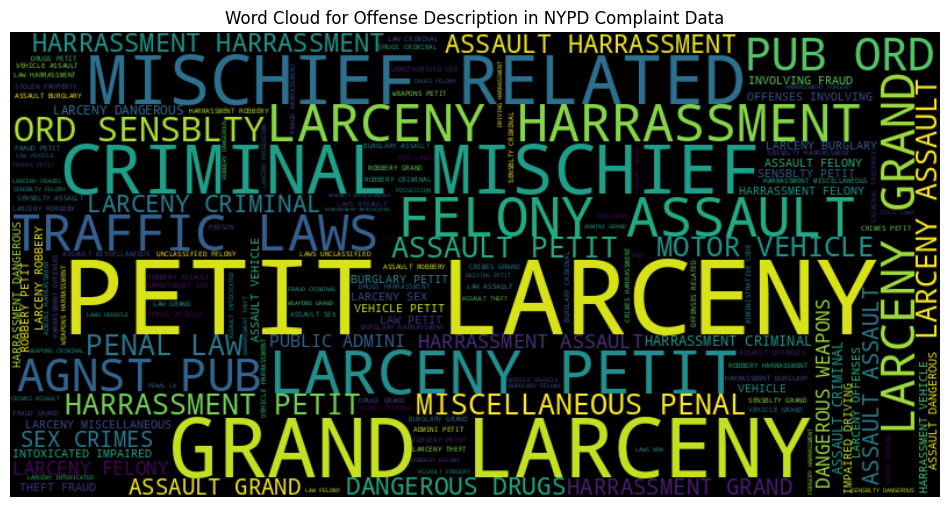

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

exclude_words = ['RELATED OFFENSES']

# Generate word cloud data, excluding specified words
text = ' '.join(df['OFNS_DESC'].dropna())
for word in exclude_words:
    text = text.replace(word, '')

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=150, colormap='viridis').generate(text)

# Display the generated image:
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Offense Description in NYPD Complaint Data')
plt.show()


In [ ]:
location1='/content/drive/MyDrive/Colab Notebooks/big-data-Colab/income_tax_data.csv'
df1= pd.read_csv(location1)
print(df1)

     Tax Year         Place of Residence             County  \
0        1999      New York City - Bronx              Bronx   
1        1999      New York City - Kings              Kings   
2        1999  New York City - Manhattan          Manhattan   
3        1999     New York City - Queens             Queens   
4        1999   New York City - Richmond           Richmond   
..        ...                        ...                ...   
133      2021      New York City - Kings              Kings   
134      2021  New York City - Manhattan          Manhattan   
135      2021     New York City - Queens             Queens   
136      2021   New York City - Richmond           Richmond   
137      2021          All New York City  All New York City   

     Number of All Returns  NY AGI of All Returns (in thousands) *  \
0                   427443                             11701984000   
1                   853382                             28369452000   
2                   737735       

Compare NYC yearly income rate againt number of complaints Boro Wise

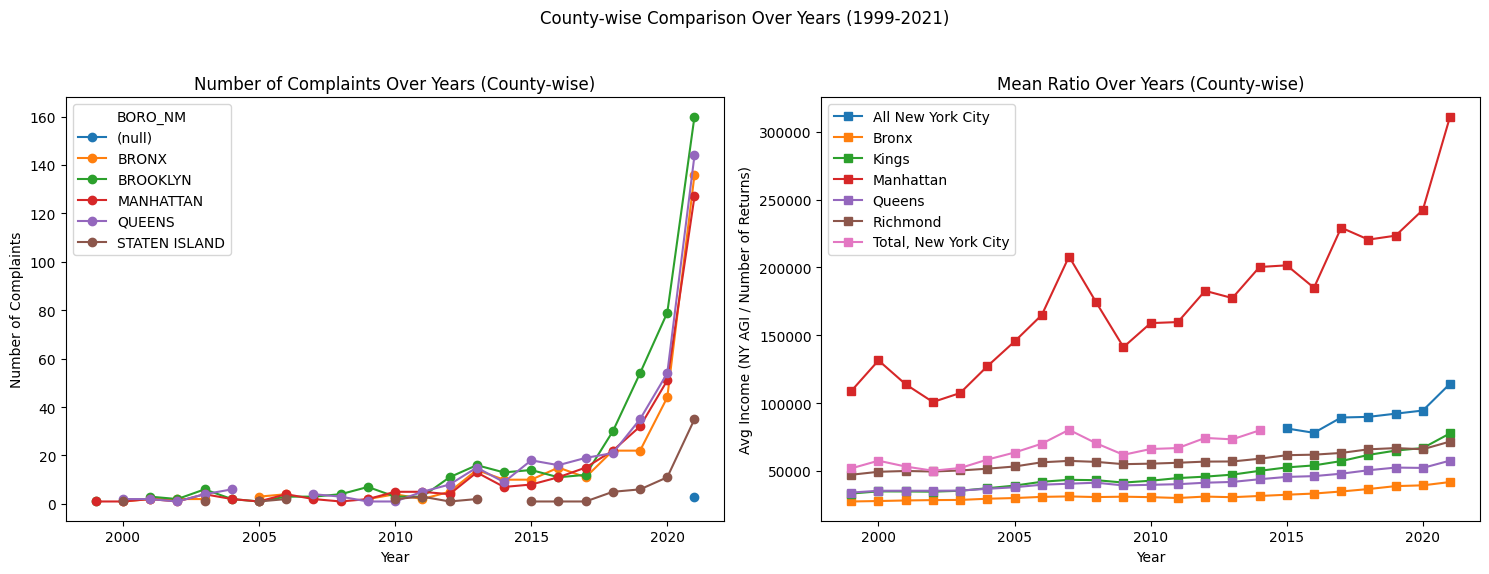

In [ ]:
|import pandas as pd
import matplotlib.pyplot as plt

# Extract year from the 'CMPLNT_FR_DT' column in NYPD complaint data
df['Year'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').dt.year

# Drop rows with NaT values and filter for the years between 1999 and 2021
df = df.dropna(subset=['Year'])
df = df[(df['Year'] >= 1999) & (df['Year'] <= 2021)]

# Group by year and count the number of complaints
complaints_per_year = df.groupby('Year').size()

complaints_per_year_county = df.groupby(['Year', 'BORO_NM']).size().unstack()

df1['Avg Income'] = df1['NY AGI of All Returns (in thousands) *'] / df1['Number of All Returns']

income_tax_ratio_county = df1.groupby(['Tax Year', 'County'])['Avg Income'].mean().unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the number of complaints per year and county
complaints_per_year_county.plot(ax=axes[0], marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Complaints')
axes[0].set_title('Number of Complaints Over Years (County-wise)')

# Plot the mean ratio of 'NY AGI of All Returns' by 'Number of All Returns' per year and county
income_tax_ratio_county.plot(ax=axes[1], marker='s')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Avg Income (NY AGI / Number of Returns)')
axes[1].set_title('Mean Ratio Over Years (County-wise)')

# Title and legend
plt.suptitle('County-wise Comparison Over Years (1999-2021)')
plt.legend(loc='upper left')

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
location ='drive/MyDrive/Final_Project/NYC_Data_Crime_Factors.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(location)
df.sort_values('Boro_NM')
print(df)

     FIP        Boro_NM  Complaint_Count  Median_Income  Poverty_Rate  \
0  36047       Brooklyn            76380          59875          10.6   
1  36061      Manhattan            64265          95866          17.3   
2  36081         Queens            59577          80557          13.0   
3  36005          Bronx            58909          45517          27.7   
4  36085  Staten Island            12155          93164          11.0   

   Foreign_Popluation  Education  School_Enrol  Class_of_worker  \
0                29.4       19.6          75.8             11.8   
1                28.6       64.5          49.5              8.8   
2                47.5       35.4          62.4             14.3   
3                35.6       21.8          67.4             15.7   
4                26.0       34.0          66.8             20.9   

   Employment_Rate  
0             57.9  
1             62.5  
2             60.1  
3             52.1  
4             57.9  


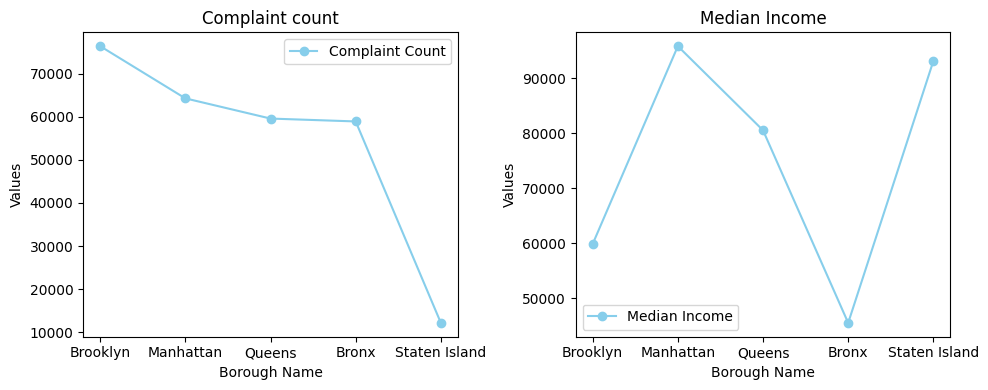

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Boro_NM'], df['Complaint_Count'], marker='o', label='Complaint Count', color='skyblue', linestyle='-')
plt.title("Complaint count")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Boro_NM'], df['Median_Income'], marker='o', label='Median Income', color='skyblue', linestyle='-')
plt.title("Median Income")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

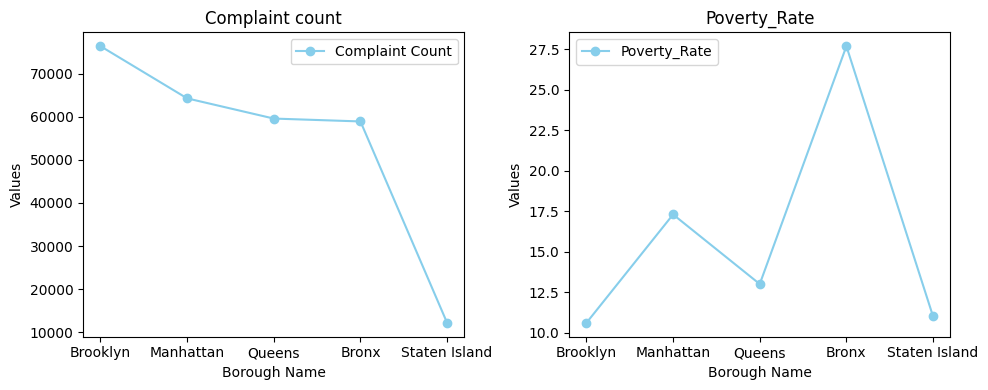

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Boro_NM'], df['Complaint_Count'], marker='o', label='Complaint Count', color='skyblue', linestyle='-')
plt.title("Complaint count")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Boro_NM'], df['Poverty_Rate'], marker='o', label='Poverty_Rate', color='skyblue', linestyle='-')
plt.title("Poverty_Rate")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

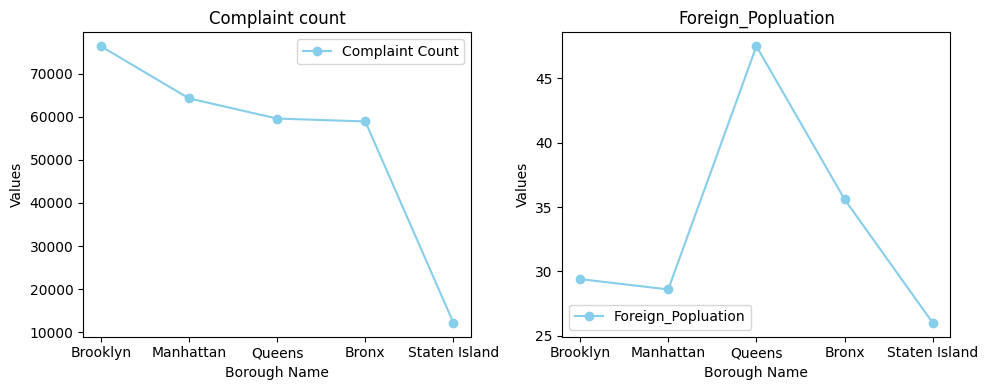

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Boro_NM'], df['Complaint_Count'], marker='o', label='Complaint Count', color='skyblue', linestyle='-')
plt.title("Complaint count")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Boro_NM'], df['Foreign_Popluation'], marker='o', label='Foreign_Popluation', color='skyblue', linestyle='-')
plt.title("Foreign_Popluation")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

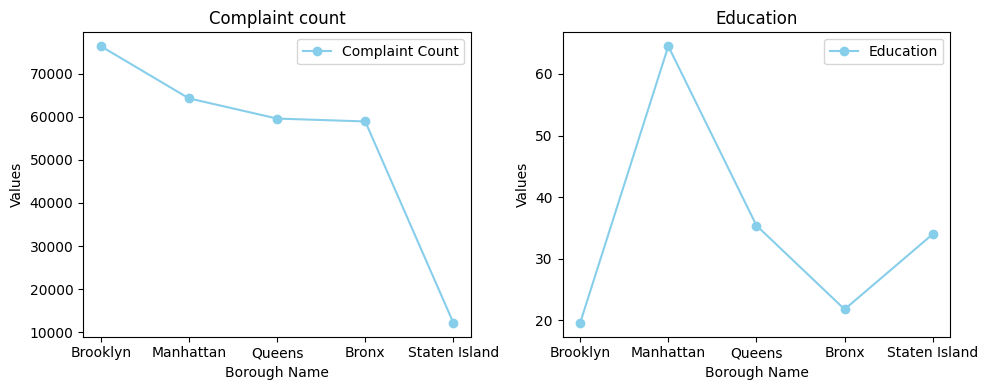

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Boro_NM'], df['Complaint_Count'], marker='o', label='Complaint Count', color='skyblue', linestyle='-')
plt.title("Complaint count")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Boro_NM'], df['Education'], marker='o', label='Education', color='skyblue', linestyle='-')
plt.title("Education")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

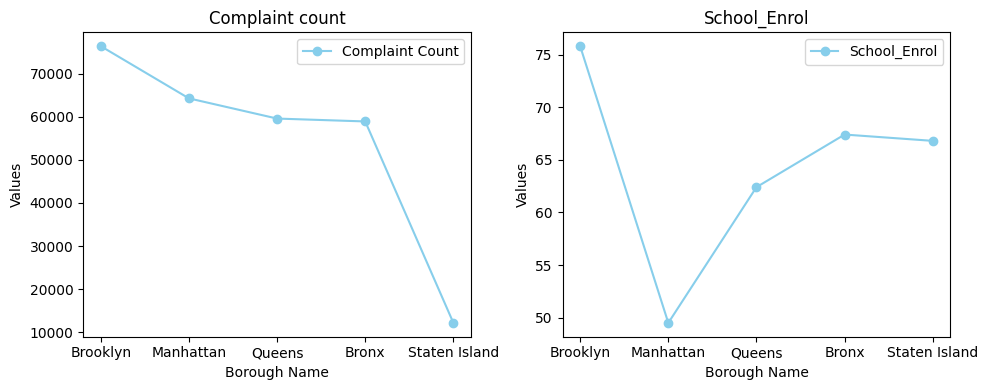

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Boro_NM'], df['Complaint_Count'], marker='o', label='Complaint Count', color='skyblue', linestyle='-')
plt.title("Complaint count")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Boro_NM'], df['School_Enrol'], marker='o', label='School_Enrol', color='skyblue', linestyle='-')
plt.title("School_Enrol")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

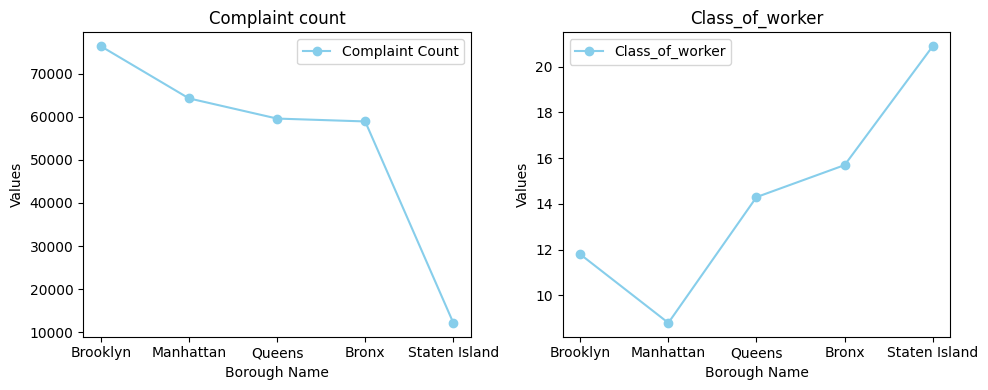

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Boro_NM'], df['Complaint_Count'], marker='o', label='Complaint Count', color='skyblue', linestyle='-')
plt.title("Complaint count")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Boro_NM'], df['Class_of_worker'], marker='o', label='Class_of_worker', color='skyblue', linestyle='-')
plt.title("Class_of_worker")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

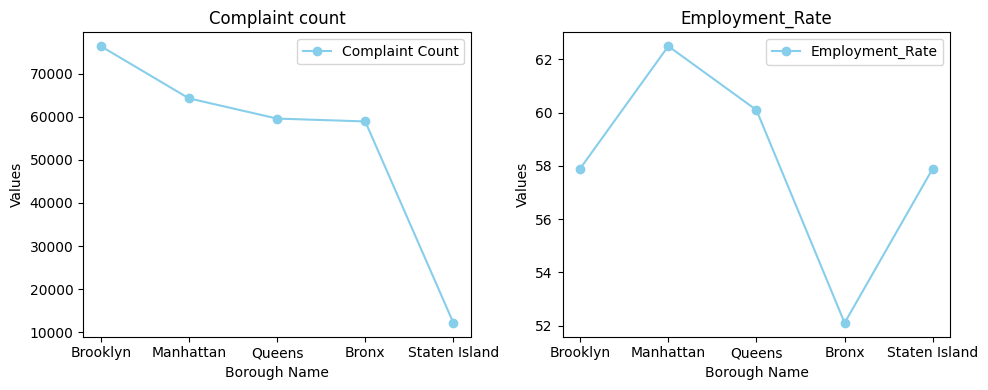

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Boro_NM'], df['Complaint_Count'], marker='o', label='Complaint Count', color='skyblue', linestyle='-')
plt.title("Complaint count")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Boro_NM'], df['Employment_Rate'], marker='o', label='Employment_Rate', color='skyblue', linestyle='-')
plt.title("Employment_Rate")
plt.xlabel('Borough Name')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()